### K Means Clustering for sample_stocks.csv
http://www.michaeljgrogan.com/k-means-clustering-python-sklearn/

In [31]:
import pandas
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [32]:
variables = pandas.read_csv('sample_stocks.csv')
Y = variables[['returns']]
X = variables[['dividendyield']]
X_norm = (X - X.mean()) / (X.max() - X.min())
Y_norm = (Y - Y.mean()) / (Y.max() - Y.min())


In [19]:
Nc = range(1, 20)

In [11]:
Nc

range(1, 20)

In [33]:
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [34]:
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

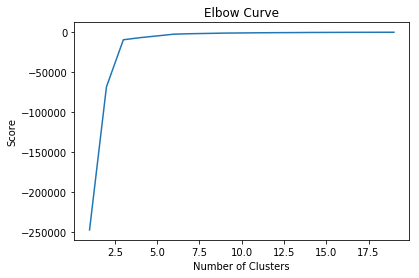

In [21]:


kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## The pca algorithm is being used to convert data that might be overly dispersed into a set of linear combinations that can more easily be interpreted.



In [15]:
pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X)

In [24]:
kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(Y)

In [25]:
kmeansoutput

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

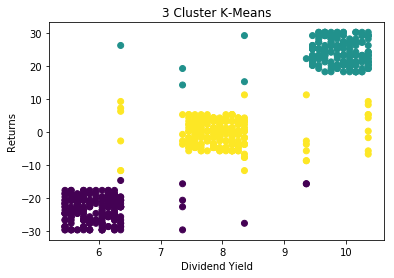

In [26]:


pl.figure('3 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Dividend Yield')
pl.ylabel('Returns')
pl.title('3 Cluster K-Means')
pl.show()

#### From the above, we see that the clustering algorithm demonstrates an overall positive correlation between stock returns and dividend yields, implying that stocks paying higher dividend yields can be expected to have higher overall returns. While this is a more simplistic example and could be modelled through linear regression analysis, there are many instances where relationships between data will not be linear and k-means can serve as a valuable tool in understanding the data through clustering methods.